In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


# Importing The Libraries

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



# Reading The Dataset: 

In [50]:
df = pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv",low_memory = False)
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


# Plan: 
### There are 26 columns. 
### Generally, categorical variables are not important in price prediction, such as name, id, house rules, license. These can be removed.
### I will delete some of them and fill in the empty elements of some of them. 
###  I will make the categorical variables numeric. 
### I will make a price estimate in the linear regression section.
### For the unsupervised learning, I will do clustering based on location and the price.
### I will look at the average prices of different neighborhoods by using lat and long variables and understand which areas are more expensive or more affordable.

In [51]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

(None, (102599, 26))

In [52]:
# Checks the number of empty values in the numerical columns
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [53]:
# I think that categorical variables such as house rules, id,license, name are generally not important for price prediction.
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [54]:
# It works only for numeric columns, displays mathematical analysis
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


# Filling Missing Values and Dropping Unnecessary Columns for the Target Variable : 

In [55]:
columns_to_drop = ['id', 'host id', 'host name', 'license', 'last review', 'NAME','house_rules', 'country', 'country code']
data_cleaned = df.drop(columns=columns_to_drop)

In [56]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   neighbourhood group             102570 non-null  object 
 2   neighbourhood                   102583 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   instant_bookable                102494 non-null  object 
 6   cancellation_policy             102523 non-null  object 
 7   room type                       102599 non-null  object 
 8   Construction year               102385 non-null  float64
 9   price                           102352 non-null  object 
 10  service fee                     102326 non-null  object 
 11  minimum nights                  102190 non-null  float64
 12  number of review

In [57]:
# I wanted to check to see meaningless values (like typo errors), and I will make a graph for these values for better understanding before turning it into the numerical ones
data_cleaned['instant_bookable'].value_counts(dropna = False), data_cleaned['cancellation_policy'].value_counts(dropna = False), data_cleaned['room type'].value_counts(dropna = False)


(instant_bookable
 False    51474
 True     51020
 NaN        105
 Name: count, dtype: int64,
 cancellation_policy
 moderate    34343
 strict      34106
 flexible    34074
 NaN            76
 Name: count, dtype: int64,
 room type
 Entire home/apt    53701
 Private room       46556
 Shared room         2226
 Hotel room           116
 Name: count, dtype: int64)

In [58]:
#Filling numerical columns with the median
numerical_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for col in numerical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

In [59]:
#Filling categorical columns with the mode

categorical_columns = ['host_identity_verified', 'neighbourhood group', 'neighbourhood',
                        'instant_bookable', 'cancellation_policy',
                       'room type']
for col in categorical_columns:
    data_cleaned[col] =  data_cleaned[col].fillna(data_cleaned[col].mode()[0])
data_cleaned.isnull().sum()

/tmp/ipykernel_36/126168612.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned[col] =  data_cleaned[col].fillna(data_cleaned[col].mode()[0])


host_identity_verified              0
neighbourhood group                 0
neighbourhood                       0
lat                                 8
long                                8
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
price                             247
service fee                       273
minimum nights                      0
number of reviews                   0
reviews per month                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
dtype: int64

In [60]:
# So I realized that, price and service fee still have null values. 
# So printed the values for both and checked what is wrong.
data_cleaned['price'].value_counts(dropna = False) 


price
NaN        247
$206       137
$1,056     132
$481       129
$833       128
          ... 
$369        58
$923        57
$786        54
$89         53
$187        52
Name: count, Length: 1152, dtype: int64

In [61]:
#data_cleaned['service fee'].value_counts(dropna = False) 


In [62]:
# There are empty lines in price, delete them, just to be sure I did the same thing in service fee
# Then separated them from dollar and comma signs and converted them to numeric values
data_cleaned = data_cleaned.dropna(subset=['price'])
data_cleaned = data_cleaned.dropna(subset=['service fee'])
data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)
data_cleaned['service fee'] = data_cleaned['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [63]:
# To check, I printed. There is no longer a null value and both are numerical.
data_cleaned['service fee'].value_counts(dropna = False), data_cleaned['price'].value_counts(dropna = False) 

(service fee
 41.0     524
 216.0    524
 81.0     518
 177.0    516
 57.0     513
         ... 
 58.0     383
 73.0     383
 67.0     380
 10.0     266
 240.0    248
 Name: count, Length: 231, dtype: int64,
 price
 206.0     137
 1056.0    132
 481.0     129
 833.0     128
 573.0     127
          ... 
 369.0      58
 923.0      56
 786.0      54
 89.0       53
 187.0      52
 Name: count, Length: 1151, dtype: int64)

In [64]:
# To handle the missing values for the lat and long columns, I simply removed the rows that has empty values.
# Because in total its just 16 rows and the database is already big enough, we dont need that much.
data_cleaned['lat'].value_counts(dropna = False) 
data_cleaned = data_cleaned.dropna(subset=['lat'])
data_cleaned = data_cleaned.dropna(subset=['long'])
data_cleaned.isnull().sum(), data_cleaned.info()
# I did this because after fillna or drop rows I have to use it to realign the rows.
# data_cleaned.reset_index(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 102105 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102105 non-null  object 
 1   neighbourhood group             102105 non-null  object 
 2   neighbourhood                   102105 non-null  object 
 3   lat                             102105 non-null  float64
 4   long                            102105 non-null  float64
 5   instant_bookable                102105 non-null  bool   
 6   cancellation_policy             102105 non-null  object 
 7   room type                       102105 non-null  object 
 8   Construction year               102105 non-null  float64
 9   price                           102105 non-null  float64
 10  service fee                     102105 non-null  float64
 11  minimum nights                  102105 non-null  float64
 12  number of reviews    

(host_identity_verified            0
 neighbourhood group               0
 neighbourhood                     0
 lat                               0
 long                              0
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 service fee                       0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 dtype: int64,
 None)

In [65]:
data_cleaned['cancellation_policy'].unique().tolist(), 

(['strict', 'moderate', 'flexible'],)

In [66]:
data_cleaned['neighbourhood'].value_counts(dropna = False) 


neighbourhood
Bedford-Stuyvesant        7914
Williamsburg              7740
Harlem                    5442
Bushwick                  4953
Hell's Kitchen            3955
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

# Exploratory Data Analysis -Visualization-


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


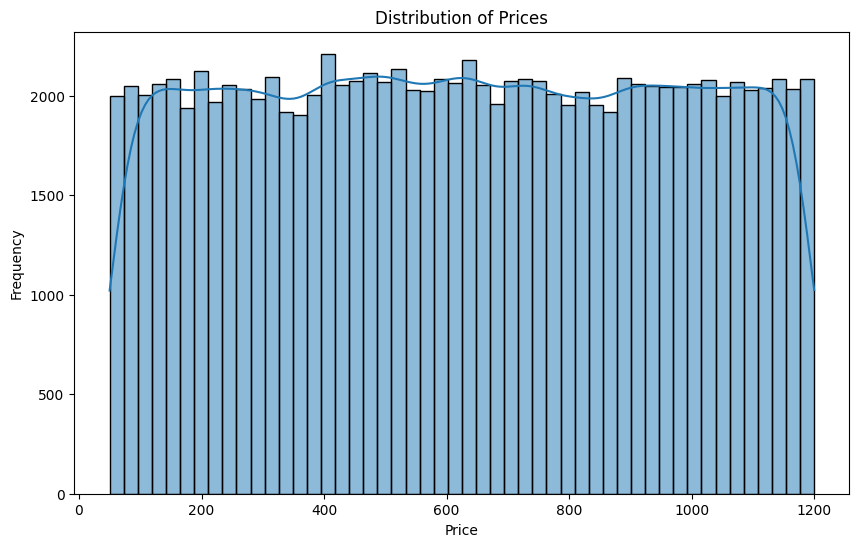

In [67]:
# The target variable is price, so I looked its distribution. Most homes in general are around $400.
# Overall the distribution appears to be uniform.
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

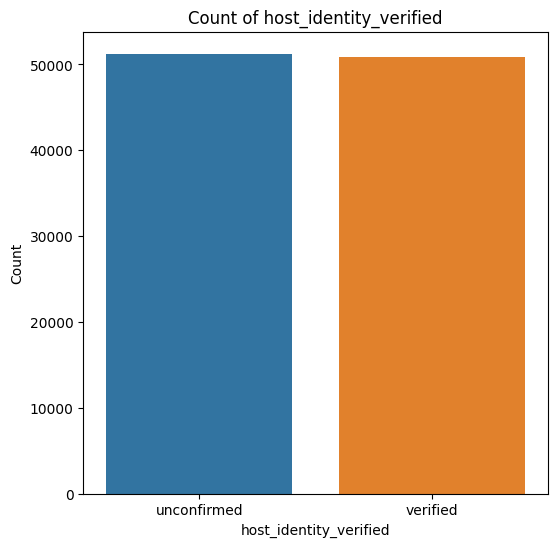

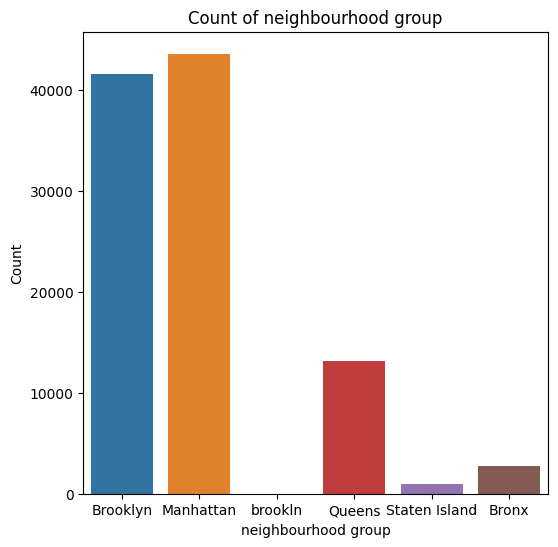

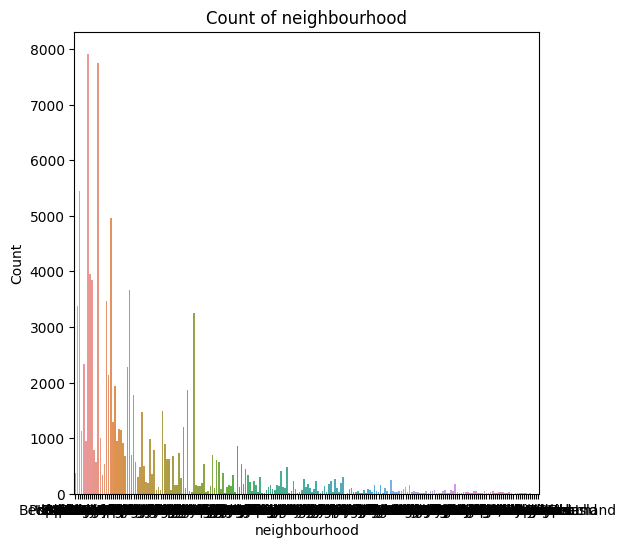

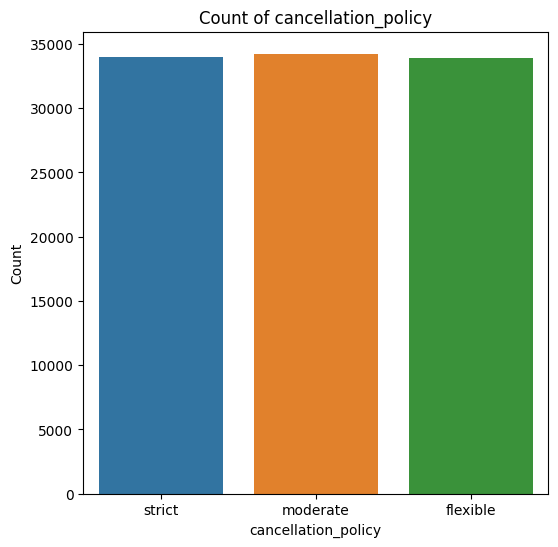

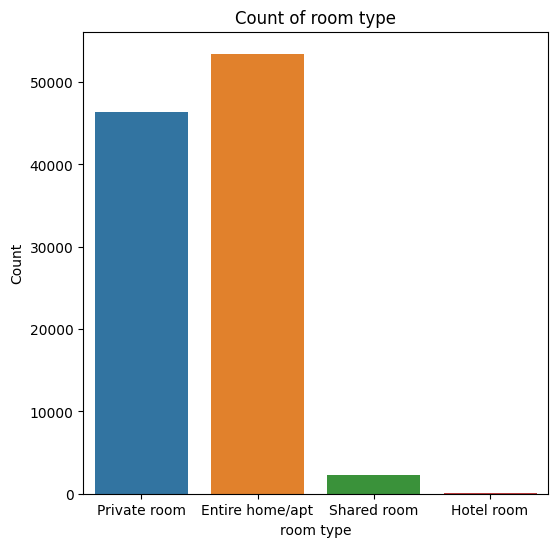

In [68]:
# I wanted to see the numbers graphically. and I noticed that there was a misspelled value in the neighbourhood section.
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=column, data=data_cleaned)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

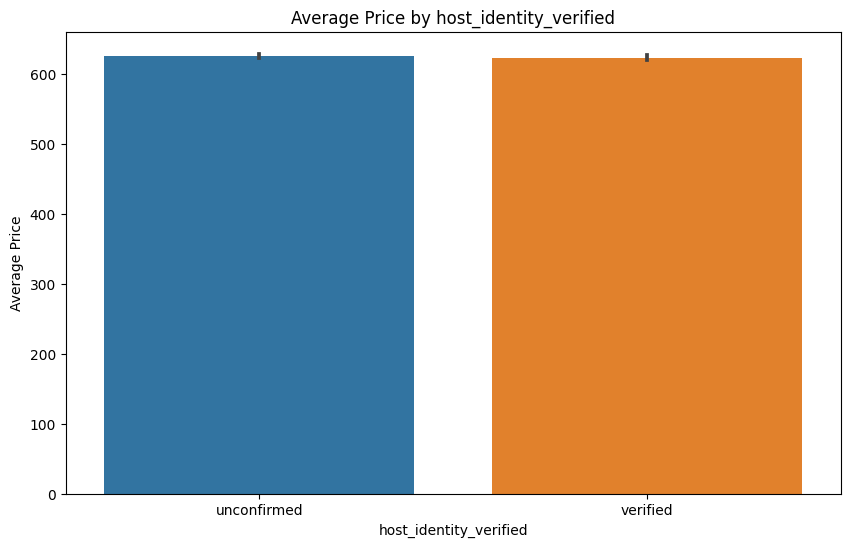

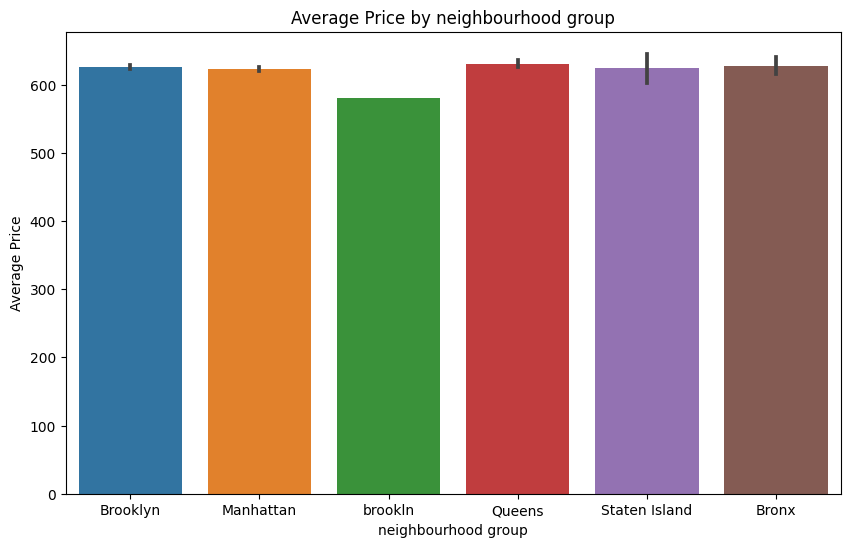

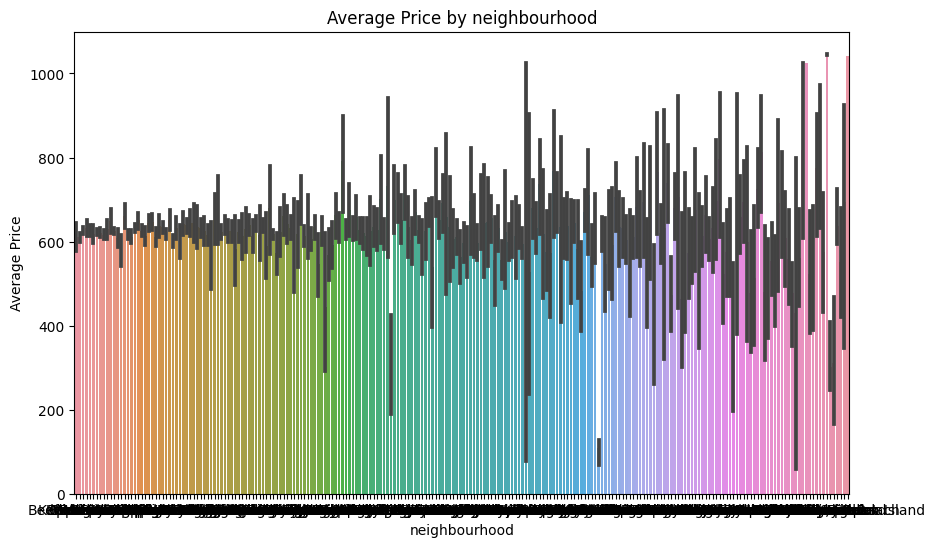

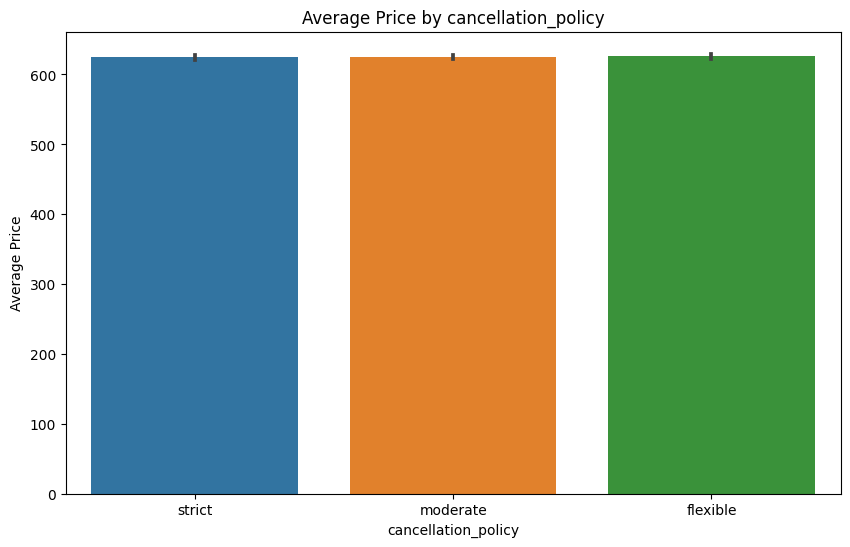

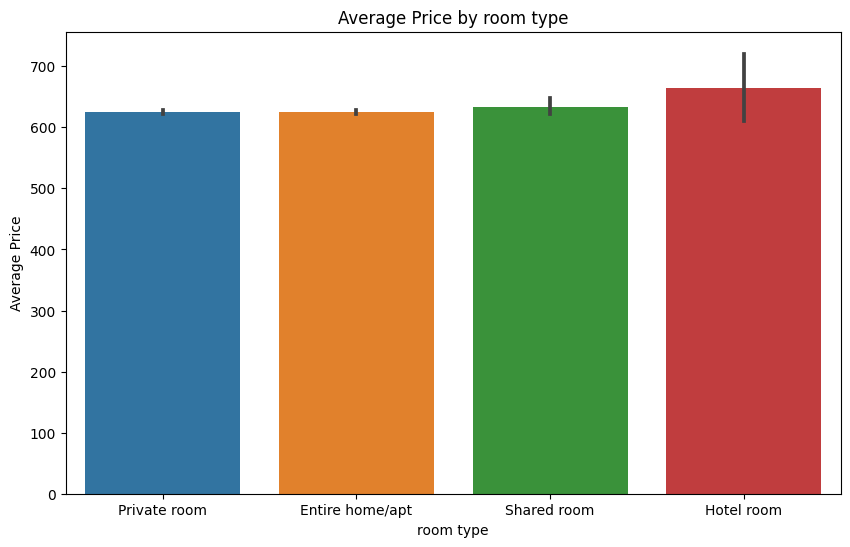

In [69]:
# I created another chart to compare with price for each categorical column. 
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='price', data=data_cleaned)
    plt.title(f'Average Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.show()

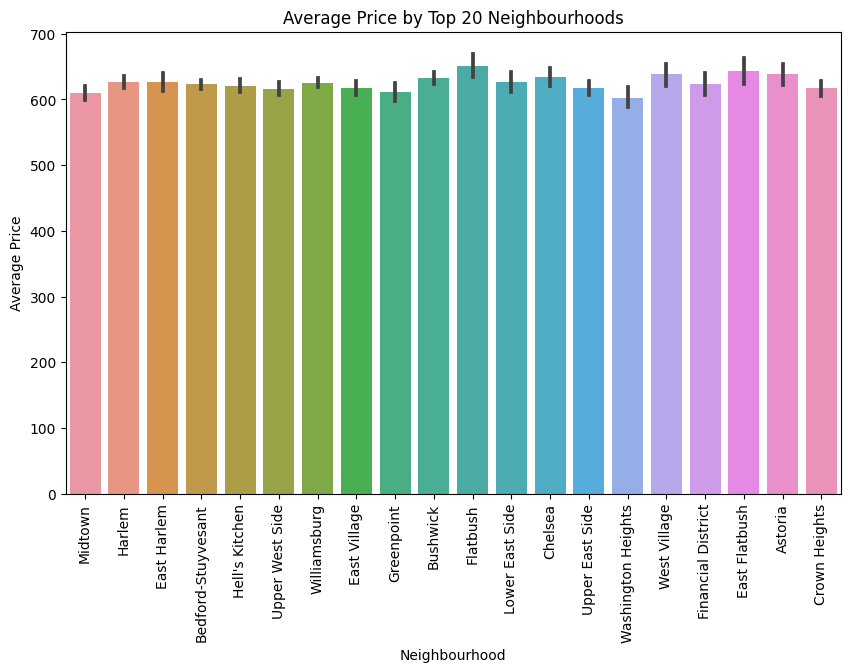

In [70]:
# As an interpretation of the above graphs: In general, the data is distributed uniformly according to price and the hotel room stands out as more expensive.
# I did this below code to see the neighbourhood more clearly because there are so many values. So I filtered for top 20.
top_neighbourhoods = data_cleaned['neighbourhood'].value_counts().nlargest(20).index


filtered_data = data_cleaned[data_cleaned['neighbourhood'].isin(top_neighbourhoods)]

plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='price', data=filtered_data)
plt.title('Average Price by Top 20 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


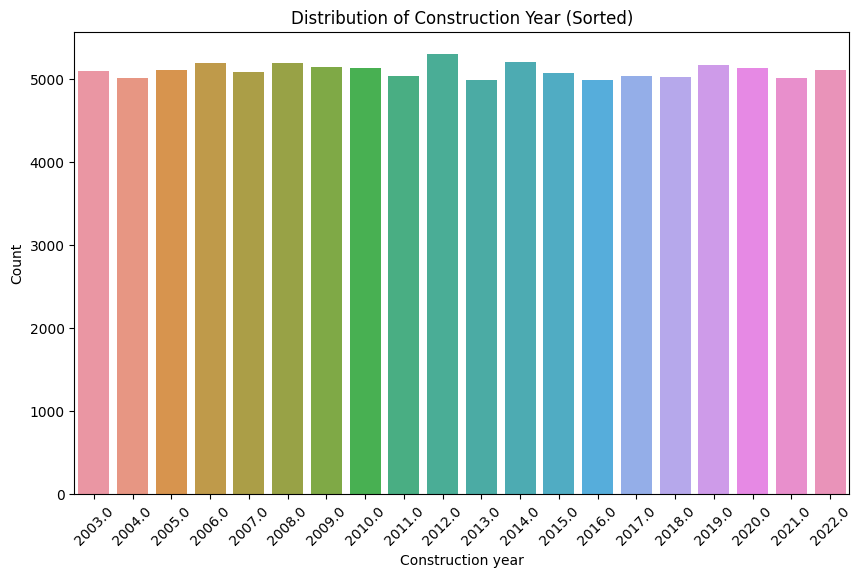

In [71]:
#In the graph, the number of houses built for almost all years is very similar. 
#Approximately 5000 houses are built every year. This shows that the data has a fairly even distribution.
#Since there is no significant difference between years, variables such as construction year and price may not have very different effects.
#So, the year will not affect the price significantly.
sorted_years = data_cleaned['Construction year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_years.index, y=sorted_years.values)
plt.title('Distribution of Construction Year (Sorted)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Converting Categorical Variables into Numerical Ones: 

In [72]:
# Now I realized I have to drop the neighbourhood also, because there are too many categorical values in it.
data_cleaned.info()
data_cleaned = data_cleaned.drop(columns = "neighbourhood")
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102105 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102105 non-null  object 
 1   neighbourhood group             102105 non-null  object 
 2   neighbourhood                   102105 non-null  object 
 3   lat                             102105 non-null  float64
 4   long                            102105 non-null  float64
 5   instant_bookable                102105 non-null  bool   
 6   cancellation_policy             102105 non-null  object 
 7   room type                       102105 non-null  object 
 8   Construction year               102105 non-null  float64
 9   price                           102105 non-null  float64
 10  service fee                     102105 non-null  float64
 11  minimum nights                  102105 non-null  float64
 12  number of reviews    

In [73]:
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'room type', 'instant_bookable', 'cancellation_policy']
# There was a typo error that I noticed in the chart and I corrected it.
data_cleaned['neighbourhood group'].value_counts(dropna = False) 

neighbourhood group
Manhattan        43609
Brooklyn         41645
Queens           13200
Bronx             2700
Staten Island      950
brookln              1
Name: count, dtype: int64

In [74]:
data_cleaned['neighbourhood group'] = data_cleaned['neighbourhood group'].replace({
    'brookln': 'Brooklyn'})
# I checked whether it is worked. 
data_cleaned['neighbourhood group'].value_counts(dropna = False) 
data_cleaned['instant_bookable'].value_counts(dropna = False) 

instant_bookable
False    51329
True     50776
Name: count, dtype: int64

In [75]:
# One Hot Encoder: 
dummies = pd.get_dummies(data_cleaned[['cancellation_policy','room type','host_identity_verified','neighbourhood group']])

# It combines the original DataFrame with the columns converted with one-hot encoding. The axis=1 parameter specifies that the merge will be done on a column-by-column basis.
encoded_data = pd.concat([data_cleaned, dummies], axis=1)
encoded_data= encoded_data.drop(['cancellation_policy', 'room type', 'host_identity_verified', 'neighbourhood group'], axis=1)
encoded_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102105 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   lat                                 102105 non-null  float64
 1   long                                102105 non-null  float64
 2   instant_bookable                    102105 non-null  bool   
 3   Construction year                   102105 non-null  float64
 4   price                               102105 non-null  float64
 5   service fee                         102105 non-null  float64
 6   minimum nights                      102105 non-null  float64
 7   number of reviews                   102105 non-null  float64
 8   reviews per month                   102105 non-null  float64
 9   review rate number                  102105 non-null  float64
 10  calculated host listings count      102105 non-null  float64
 11  availability 365               

In [76]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102105 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   lat                                 102105 non-null  float64
 1   long                                102105 non-null  float64
 2   instant_bookable                    102105 non-null  bool   
 3   Construction year                   102105 non-null  float64
 4   price                               102105 non-null  float64
 5   service fee                         102105 non-null  float64
 6   minimum nights                      102105 non-null  float64
 7   number of reviews                   102105 non-null  float64
 8   reviews per month                   102105 non-null  float64
 9   review rate number                  102105 non-null  float64
 10  calculated host listings count      102105 non-null  float64
 11  availability 365               

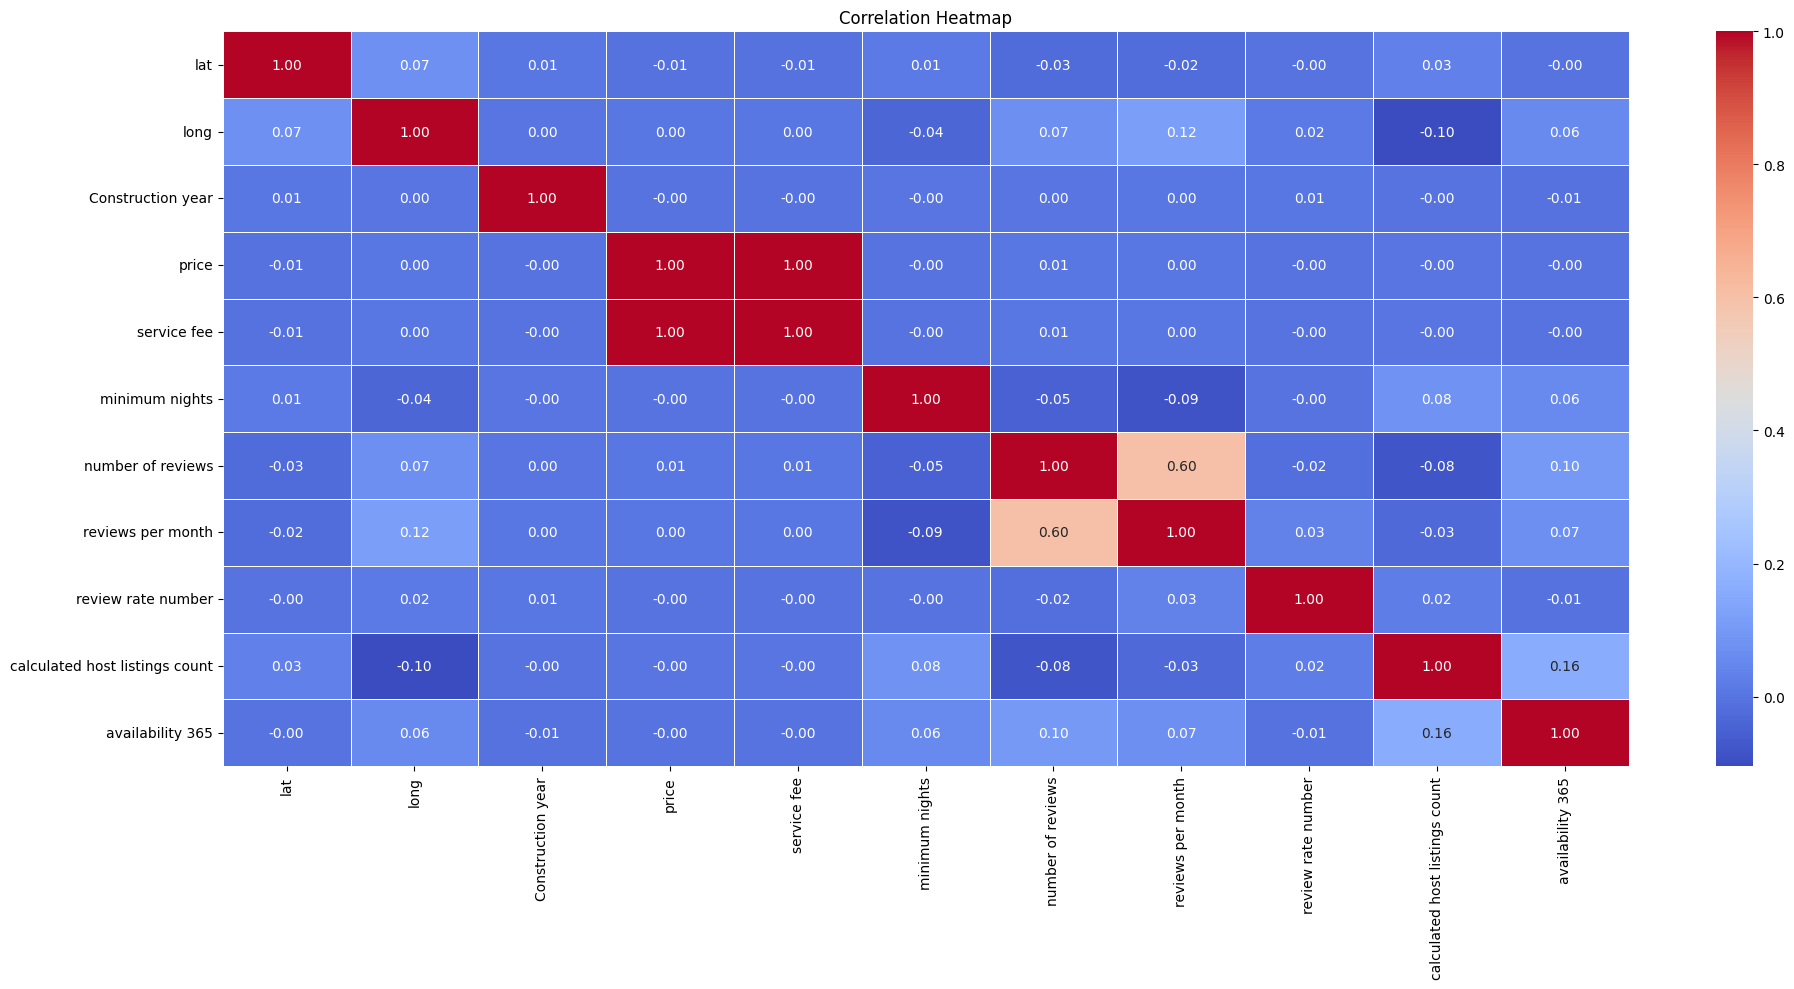

In [77]:
# Since it seemed strange that the other elements had little effect on the correlation, I looked at the correlation after making the scaler, and there was no change.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data.select_dtypes(include=[np.number]))

correlation_matrix = pd.DataFrame(scaled_data, columns=encoded_data.select_dtypes(include=[np.number]).columns).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

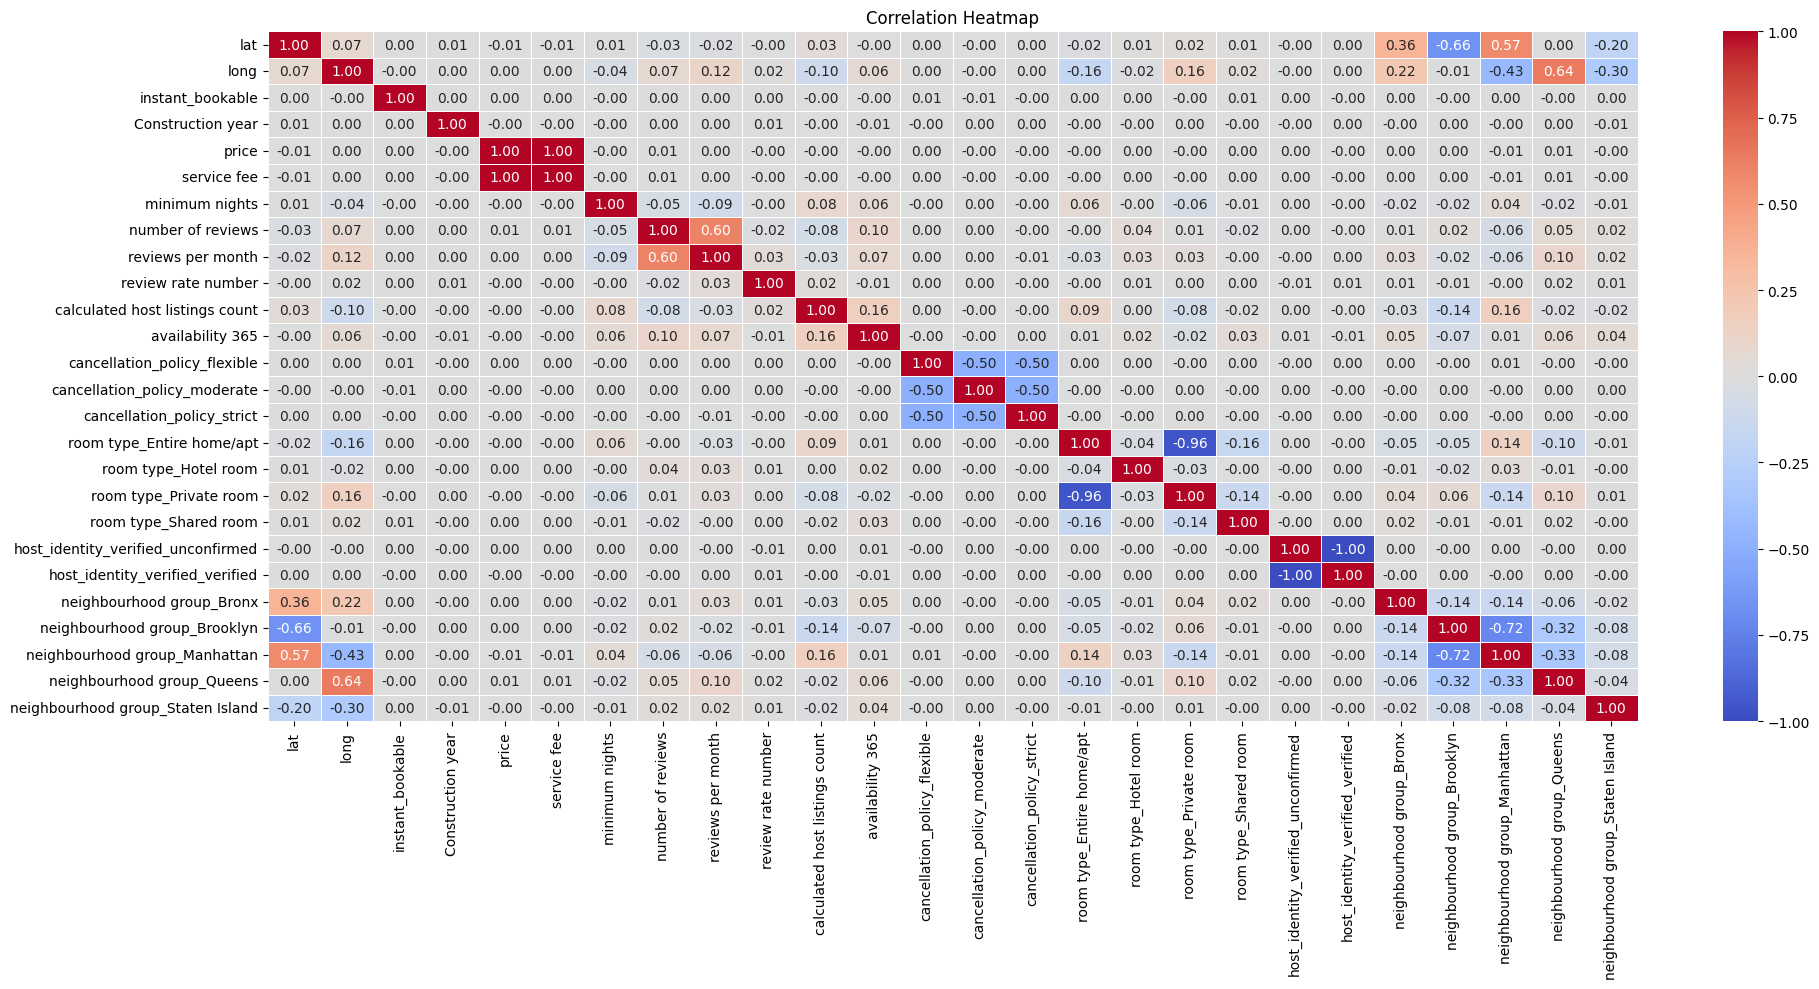

In [78]:
# Apparently, other than the service fee, others do not have much effect on the price, 
# but we cannot measure this only by correlation because sometimes it may have an indirect effect on the target variable. But overfit is possible because of that.

plt.figure(figsize=(20, 10))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Model Training: - Regression Model-

In [79]:
X = encoded_data.drop(columns=['price'])
y = encoded_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)
residuals = y_test - y_pred_linear_reg


rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_linear_reg))
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

rmse_lin, r2_linear_reg


(1.4198603217155779, 0.9999816608847755)

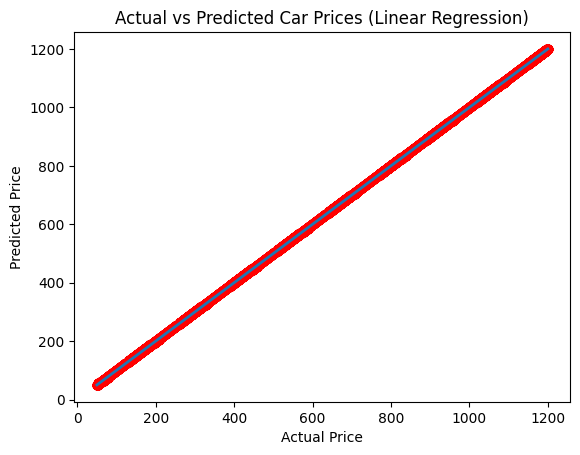

In [80]:
# So it overfitted, because I think it has a lot relation with service fee. Maybe the problem is in scaling, the service fee value may be too high.
plt.scatter(y_test, y_pred_linear_reg, color='red', label='Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  lw=2, label='Actual Price')
plt.title('Actual vs Predicted Car Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Unsupervised Learning - Clustering Based On Price and Geographical Location - : 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


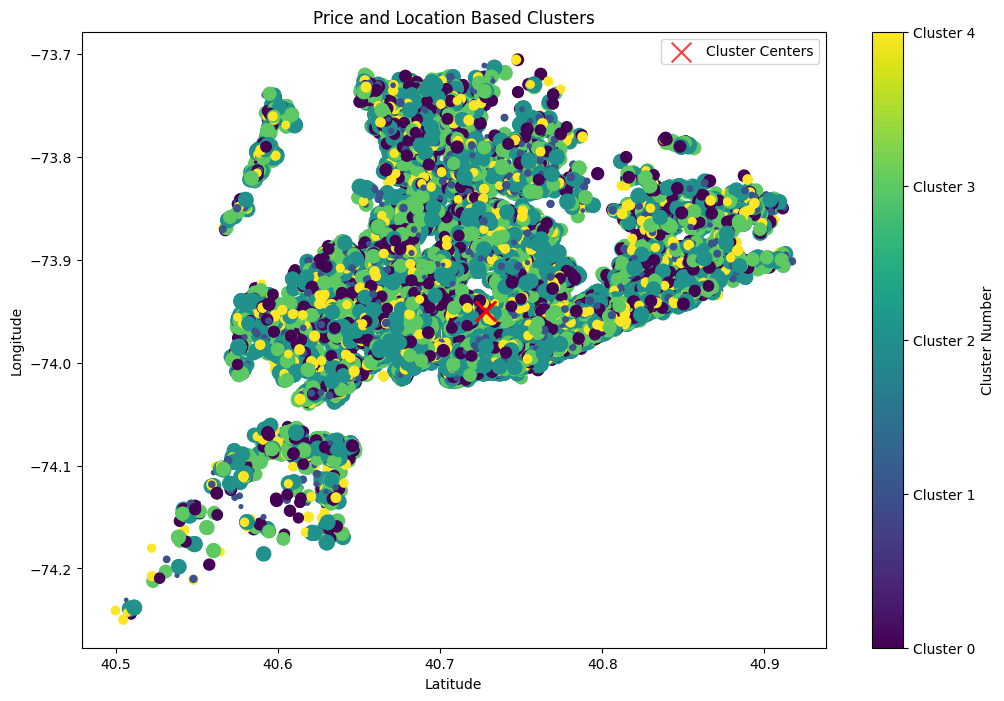

cluster
0     623.277952
1     164.711276
2    1085.267248
3     854.984951
4     395.281807
Name: price, dtype: float64
Result: 
Accordingly:
Cluster 2 (Average Price: 1085.27 USD): The cluster with the highest average price.
Cluster 3 (Average Price: 854.98 USD): Another cluster with a high price.
Cluster 0 (Average Price: 623.28 USD): A medium-high priced cluster.
Cluster 4 (Average Price: 395.28 USD): A medium priced cluster.
Cluster 1 (Average Price: 164.71 USD): The cluster with the lowest average price.



In [81]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = encoded_data[['lat', 'long', 'price']]

kmeans = KMeans(n_clusters=5, random_state=0)
encoded_data['cluster'] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))
scatter = plt.scatter(encoded_data['lat'], encoded_data['long'], c=encoded_data['cluster'], cmap='viridis', s=encoded_data['price']/10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Price and Location Based Clusters')

# Color bar setting
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Number')
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])


plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Cluster Centers')
plt.legend()
plt.show()

# Average prices based on clusters
cluster_means = encoded_data.groupby('cluster')['price'].mean()
print(cluster_means)

# As a result, Clustering groups areas according to price segments. For example, some clusters represent higher-priced areas, while others represent lower-priced areas.

print("""Result: 
Accordingly:
Cluster 2 (Average Price: 1085.27 USD): The cluster with the highest average price.
Cluster 3 (Average Price: 854.98 USD): Another cluster with a high price.
Cluster 0 (Average Price: 623.28 USD): A medium-high priced cluster.
Cluster 4 (Average Price: 395.28 USD): A medium priced cluster.
Cluster 1 (Average Price: 164.71 USD): The cluster with the lowest average price.
""")
